# 4.2 Visualizations and Sampling

#### Importing Libraries
#### Importing Data
#### Histogram for 'order_hour_placed'
#### Bar chart for 'loyalty_flag'
#### Line chart for 'prices' by 'order_hour_placed'
#### Create a sample set of 10% of the df_sub.
#### Line chart for 'n_dependants' by 'age'
#### Scatterplot by age and income
#### Export charts and Data

## Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [7]:
# Define pathway to relevant folder
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/07-2024 Instacart Basket Analysis'

In [8]:
# Import combo_7_30.pkl
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'combo_7_30.pkl'))

In [9]:
# Check shape
df.shape

(32404859, 30)

In [10]:
# Check columns
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,Surnam,Gender,state,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Histogram for 'order_hour_placed'

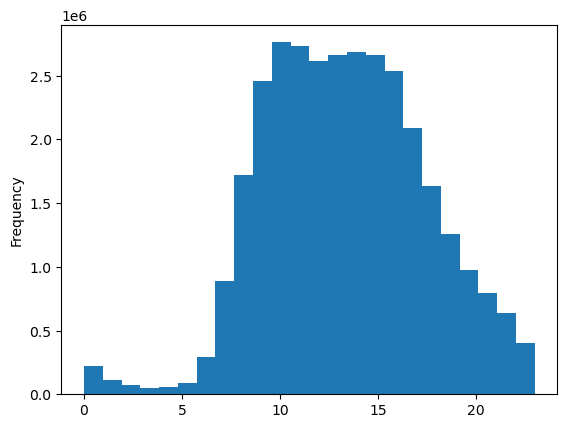

In [12]:
# Create histogram for 'order_hour_placed'
hist_hour = df['order_hour_placed'].plot.hist(bins = 24)

#### This histogram demonstrates that most orders take place between 8AM and 5PM.
#### There are very few orders placed between midnight and 6 AM.
#### 10AM is the most popular hour for orders.
#### Orders peak between 10AM and 3PM.

### Bar chart for 'loyalty_flag'

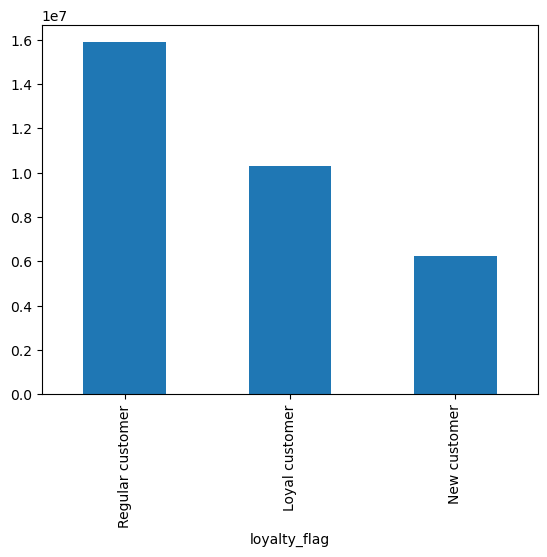

In [15]:
# Create a bar chart to show the distribution of 'loyalty_flag'
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

### Line chart for 'prices' by 'order_hour_placed'

In [17]:
# Create a new subset with only columns for 'order_hour_placed' and 'prices'
df_sub = df[['prices','order_hour_placed']]

In [18]:
# Check new subset
df_sub.head()

,prices,order_hour_placed
0,9.0,8
1,12.5,8
2,4.4,8
3,4.7,8
4,1.0,8


In [19]:
# Create a sample subset of df_sub
np.random.seed(5)
dev = np.random.rand(len(df_sub)) <= 0.7

In [20]:
dev

array([ True, False,  True, ...,  True, False,  True])

In [21]:
# Store 70% of the sample in df_big
df_big = df_sub[dev]

In [22]:
# Store 30% of the sample in df_small
df_small = df_sub[~dev]

In [23]:
# Check sizes of new subsets
len(df_big) + len(df_small)

32404859

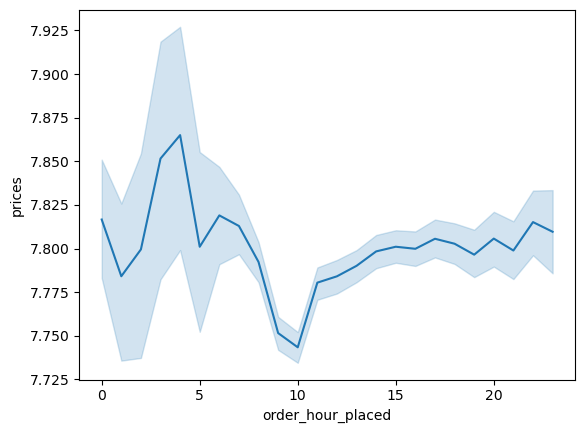

In [24]:
# Create line chart from df_small
line_prices_hour = sns.lineplot(data = df_small, x = 'order_hour_placed',y = 'prices')

In [25]:
# Check summary stats for 'prices'
df['prices'].describe()

count    3.240486e+07
mean     7.790373e+00
std      4.241763e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

#### This chart feels misleading because the spread of prices is very small. All the values fall between 7.74 and 7.87. It's hard to tell visually whether there really is an interesting difference when analyzing prices by hour.
#### I'm curious whether a smaller sample size would be better in this instance. I believe a larger sample (or the whole dataframe) would make the spread of prices even smaller. Out of curiousity, I'm going to make a 10% sample.

# Create a sample set of 10% of the df_sub.
np.random.seed(6)
dev2 = np.random.rand(len(df_sub)) <= 0.9

df_tiny = df_sub[~dev2]

line_prices_hour_tiny = sns.lineplot(data = df_tiny, x = 'order_hour_placed',y = 'prices')

#### The spread of 'prices' in this chart is only marginally larger and there is more uncertainty.

### Line chart for 'n_dependants' by 'age'

In [32]:
# Split the data into large (70%) and small (30%) subsets for the visualization
df_big_cust = df[dev]

In [33]:
# Save 30% in small subset
df_small_cust = df[~dev]

In [52]:
df_small2 = df_small_cust[['n_dependants','Age']]

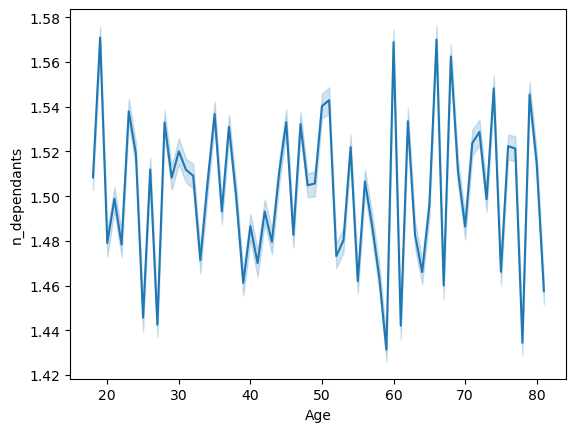

In [56]:
# Create line of 'n_dependants' by 'age'
line_dependants = sns.lineplot(data = df_small2, x = 'Age',y = 'n_dependants')

#### The line chart doesn't show any clear trends regarding age and number of dependants.

In [59]:
# Renaming 'Age' to 'age' (lowercase) for continuity
df.rename(columns = {'Age' : 'age'}, inplace = True)

### Scatterplot by age and income

In [64]:
# Create a subset of 30% of the data with only the columns 'age' and 'income'
df_small3 = df_small_cust[['Age','income']]

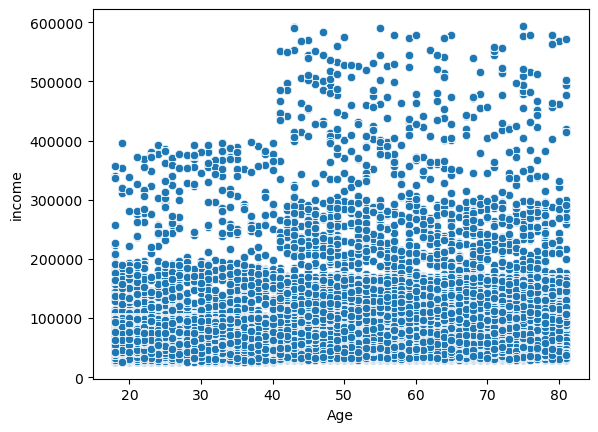

In [66]:
# Create scatterplot by age and income
scatter_income = sns.scatterplot(x = 'Age', y = 'income',data = df_small3)

#### This scatterplot shows that people under 40 do not make more than 400K. The majority of people don't make more than 200K.

### Export charts

In [70]:
# Export histogram
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [72]:
# Export bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [74]:
# Export line chart of prices by hour
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_by_hour.png'))

In [76]:
# Export line chart of dependants by age
line_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_by_age.png'))

In [78]:
# Export scatterplot of income by age
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_income_by_age.png'))

In [84]:
# Check df
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_placed', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'med_days_prior', 'frequency_flag', 'Unnamed: 0',
       'first_name', 'Surnam', 'Gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [86]:
# Rename columns for continuity
df.rename(columns = {'Surnam' : 'surname'}, inplace = True)
df.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [88]:
# Export dataframe to pickle
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'total_data.pkl'))